# Machine Learning with Numpy-Pandas-Scikit-learn
- Partition the dataset into training and testing sets.
- Used 2 different kernels (rbf and polynomial), train support vector machines to classify examples into control (0) and case (1). 
- Selected the best model for each kernel and explain  how I chose the parameters I used: kernel, soft margin(C), gamma or degree. 
- Also recorded prediction accuracy, confusion matrix and area under the ROC curve.

** How I chose the best model:
- To get a better prediction accuracy, I splited the data in folds that I useed for training and testing.
- I coded the GridSearchCV, which uses, by defualt, a 3-fold cross-validation.
- Before looking for which combination of parameter values produces the best accurate model, I specified the different candidate values I want to try.
- I have a number of candidate parameter values, including three different values for C (1, 10, 100), values for degree (1, 2, 3) or for gamma (1, 'auto'), and two kernels (rbf, polynomial). I tried several combinations of parameter values and selected the set of parameters which provides the most accurate model.**

In [1]:
import numpy as np
import pandas as pd      # built on top of numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    # built on top of matplotlib
from pandas.api.types import CategoricalDtype # enables specifying categorical agetype below

from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#import sklearn.metrics as skm

In [2]:
diabetes = pd.read_csv("diabetes2.csv", delim_whitespace=False) 
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [4]:
diabetes2 = diabetes.copy(deep=True) # insulin, bmi=mass coloring by class, histogram other numerics color by class
diabetes2['plas']= diabetes['plas'].replace(0,np.NaN)
diabetes2['pres'] = diabetes['pres'].replace(0,np.NaN)
diabetes2['skin'] = diabetes['skin'].replace(0,np.NaN)
diabetes2['insu'] = diabetes['insu'].replace(0,np.NaN)
diabetes2['mass'] = diabetes['mass'].replace(0,np.NaN)
diabetes2.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     763 non-null float64
pres     733 non-null float64
skin     541 non-null float64
insu     394 non-null float64
mass     757 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.0 KB


In [6]:
print diabetes2.apply(np.nanmedian, axis = 0) #calculate medians to compare with means
diabetes2.describe() # shows means

preg       3.0000
plas     117.0000
pres      72.0000
skin      29.0000
insu     125.0000
mass      32.3000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
X = diabetes2.drop(labels=['class','insu','skin'], axis=1)
print X
y = diabetes2.loc[:,'class'] # alt: use iloc for index based data selection
print y
print y.unique()
X_col_names = X.columns.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
X_train.describe()

     preg   plas  pres  mass   pedi  age
0       6  148.0  72.0  33.6  0.627   50
1       1   85.0  66.0  26.6  0.351   31
2       8  183.0  64.0  23.3  0.672   32
3       1   89.0  66.0  28.1  0.167   21
4       0  137.0  40.0  43.1  2.288   33
5       5  116.0  74.0  25.6  0.201   30
6       3   78.0  50.0  31.0  0.248   26
7      10  115.0   NaN  35.3  0.134   29
8       2  197.0  70.0  30.5  0.158   53
9       8  125.0  96.0   NaN  0.232   54
10      4  110.0  92.0  37.6  0.191   30
11     10  168.0  74.0  38.0  0.537   34
12     10  139.0  80.0  27.1  1.441   57
13      1  189.0  60.0  30.1  0.398   59
14      5  166.0  72.0  25.8  0.587   51
15      7  100.0   NaN  30.0  0.484   32
16      0  118.0  84.0  45.8  0.551   31
17      7  107.0  74.0  29.6  0.254   31
18      1  103.0  30.0  43.3  0.183   33
19      1  115.0  70.0  34.6  0.529   32
20      3  126.0  88.0  39.3  0.704   27
21      8   99.0  84.0  35.4  0.388   50
22      7  196.0  90.0  39.8  0.451   41
23      9  119.0

,preg,plas,pres,mass,pedi,age
count,537.000000,534.000000,515.000000,531.000000,537.000000,537.000000
mean,3.836127,122.108614,71.836893,32.388136,0.481223,33.266294
std,3.380028,30.933012,11.976330,6.736016,0.337300,11.779609
min,0.000000,44.000000,30.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,27.400000,0.253000,24.000000
50%,3.000000,118.000000,72.000000,32.200000,0.378000,30.000000
75%,6.000000,141.750000,80.000000,36.450000,0.647000,41.000000
max,17.000000,198.000000,110.000000,59.400000,2.420000,81.000000


###### Impute X
- Fitted AND transformed training set
- Transformed test set on scale fitted to training set

In [10]:
imp_x = Imputer(missing_values='NaN', strategy='median', axis=0) 
X_train = imp_x.fit_transform(X_train)# # fit AND transform training set
X_test = imp_x.transform(X_test) # transform test set on scale fitted to training set
print len(y_train)
print len(y_test)

537
231


###### Using 2 different kernels (rbf and polynomial)
- Train support vector machines to classify examples into control (0) and case (1). 
- Select the best model for each kernel of "rbf" and "polynomial" 
- Also record prediction accuracy, confusion matrix and area under the ROC curve.

In [11]:
svc = SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True) # instantiates a SVM classifier
#svc = SVC(kernel='rbf', cache_size=1000, probability=True) 
print svc
clf = svc.fit(X_train, y_train) # trains the classifier on the training set
y_pred = svc.predict(X_test) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred)
print "Prediction accuracy: ",pTot

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.65367965368


###### Confusion Matrix:
Each row contains examples that are actually in the ith class.
Each column contains examples that are predicted to be in the jth class.
By definition a confusion matrix C is such that:
Cij is equal to the number of observations known to be in group i but predicted to be in group j

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[150,   0],
       [ 80,   1]])

###### Classification Report:
precision (is NOT specificity) is fraction of predicted pos that are actually pos
      aka positive predictive value = TP/ predicted pos
recall (aka sensitivity) is TP rate, is fraction of actual pos that are predicted pos
      is on y-axis of ROC curve TP rate = TP / actual pos
f1 score is the harmonic mean of precision and sensitivity: 2TP / (2TP + FP + FN)
support is number of true instances for each label:
      is confusion matrix row sum for that label

In [13]:
report = classification_report(y_test, y_pred)
print report #for each class prints: precision  recall  f1-score   support

             precision    recall  f1-score   support

          0       0.65      1.00      0.79       150
          1       1.00      0.01      0.02        81

avg / total       0.77      0.65      0.52       231



###### Scale Data for use with Machine Learning

In [14]:
print X_test #compare before/after scaling
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)# fit AND transform training set
X_test_minmax = min_max_scaler.transform(X_test)# test set transform only, no fit
X_test_minmax 

[[   0.     131.      66.      34.3      0.196   22.   ]
 [   0.     165.      90.      52.3      0.427   23.   ]
 [   7.     102.      74.      37.2      0.204   45.   ]
 ..., 
 [   1.     172.      68.      42.4      0.702   28.   ]
 [   5.     158.      84.      39.4      0.395   29.   ]
 [   4.     151.      90.      29.7      0.294   36.   ]]


array([[ 0.        ,  0.56493506,  0.45      ,  0.3907767 ,  0.04794521,
         0.01666667],
       [ 0.        ,  0.78571429,  0.75      ,  0.8276699 ,  0.14683219,
         0.03333333],
       [ 0.41176471,  0.37662338,  0.55      ,  0.46116505,  0.05136986,
         0.4       ],
       ..., 
       [ 0.05882353,  0.83116883,  0.475     ,  0.58737864,  0.26455479,
         0.11666667],
       [ 0.29411765,  0.74025974,  0.675     ,  0.51456311,  0.13313356,
         0.13333333],
       [ 0.23529412,  0.69480519,  0.75      ,  0.27912621,  0.08989726,
         0.25      ]])

In [15]:
svc = SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True) 
#svc = SVC(kernel='rbf', cache_size=1000, probability=True) 
print svc
clf = svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax)
print "Prediction accuracy: ",pTot

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.718614718615


In [16]:
cm = confusion_matrix(y_test, y_pred_minmax)
print cm
report = classification_report(y_test, y_pred_minmax)
print report #for each class prints: precision  recall  f1-score   support

[[114  36]
 [ 29  52]]
             precision    recall  f1-score   support

          0       0.80      0.76      0.78       150
          1       0.59      0.64      0.62        81

avg / total       0.72      0.72      0.72       231



In [17]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of (smoke), not of nonsmoking
roc_auc = auc(fpr, tpr)
print "thresholds", thresholds
print "probas_", probas_
print "AUC using predict_proba", roc_auc

thresholds [ 1.95206852  0.95206852  0.93235861  0.91499107  0.82855987  0.82651988
  0.74551916  0.72880379  0.72675789  0.71807256  0.69469488  0.69198883
  0.67877493  0.67509124  0.66643774  0.66260975  0.64767357  0.64746031
  0.58819777  0.56174583  0.55422109  0.54925259  0.54213928  0.52853007
  0.5155893   0.5         0.49167845  0.48956688  0.48858083  0.48263335
  0.46235451  0.43116836  0.41188342  0.39559564  0.37382567  0.37276836
  0.37004782  0.3678639   0.35175946  0.34520584  0.33973018  0.33890918
  0.32767027  0.29799736  0.2976237   0.29699857  0.29324678  0.29247513
  0.28818072  0.28671624  0.28141398  0.27762107  0.26830644  0.26605981
  0.25669815  0.25450027  0.24356943  0.24335808  0.23832034  0.22257553
  0.20767855  0.20610205  0.20023303  0.19496742  0.18694229  0.18645787
  0.17873771  0.17736918  0.17438778  0.16487185  0.16237552  0.16230004
  0.15223911  0.14500752  0.14468329  0.13936983  0.13646808  0.13358108
  0.09670827  0.09604077  0.04668938  0.

###### Plot ROC curve

In [18]:
%matplotlib inline

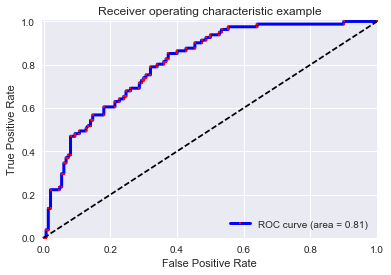

In [21]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

###### Parameter Turning

In [20]:
C_range = 10.0 ** np.arange(-2, 4)
#gamma_range = 10.0 ** np.arange(-3, 3)
# g = 1/float((len(X_train_minmax[0])))
#print g
print X_train_minmax[0]
gamma_range = [.01, .1, 1, 'auto', 10, 100]
print gamma_range
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

[ 0.29411765  0.42207792  0.4         0.42718447  0.18407534  0.06666667]
[0.01, 0.1, 1, 'auto', 10, 100]


{'C': array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
          1.00000000e+01,   1.00000000e+02,   1.00000000e+03]),
 'gamma': [0.01, 0.1, 1, 'auto', 10, 100]}

In [22]:
# Default is 3-fold cross validation
grid = GridSearchCV(SVC(kernel='rbf',cache_size=1000, probability=True), param_grid=param_grid) 
#grid = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True), param_grid=param_grid) 
grid.fit(X_train_minmax, y_train)# run the grid search on the training data only
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print "The best C and gamma for rbf is: %.5f, %.5f " % (best_C, best_gamma)
grid.best_estimator_

The best C and gamma for rbf is: 100.00000, 0.10000 


SVC(C=100.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot = accuracy_score(y_test, best_predict_minmax)
print "Prediction accuracy: ",pTot
cm = confusion_matrix(y_test, best_predict_minmax)
print cm
report = classification_report(y_test, best_predict_minmax)
print report #for each class prints: precision  recall  f1-score   support

Prediction accuracy:  0.748917748918
[[133  17]
 [ 41  40]]
             precision    recall  f1-score   support

          0       0.76      0.89      0.82       150
          1       0.70      0.49      0.58        81

avg / total       0.74      0.75      0.74       231



In [24]:
test_svc = SVC(C=100, gamma='auto',kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax_test = test_svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax_test)
print "Prediction accuracy: ",pTot

Prediction accuracy:  0.757575757576


In [25]:
cm = confusion_matrix(y_test, y_pred_minmax_test)
print cm
report = classification_report(y_test, y_pred_minmax_test)
print report #for each class prints: precision  recall  f1-score   support

[[133  17]
 [ 39  42]]
             precision    recall  f1-score   support

          0       0.77      0.89      0.83       150
          1       0.71      0.52      0.60        81

avg / total       0.75      0.76      0.75       231



In [26]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of (smoke), not of nonsmoking
roc_auc = auc(fpr, tpr)
print "AUC using predict_proba", roc_auc

AUC using predict_proba 0.809958847737


###### Polynomial

In [30]:
svc = SVC(kernel='poly', C=1.0, degree=2, class_weight='balanced', cache_size=1000, probability=True) # instantiates a SVM classifier
#svc = SVC(kernel='rbf', cache_size=1000, probability=True) 
print svc
clf = svc.fit(X_train, y_train) # trains the classifier on the training set
y_pred = svc.predict(X_test) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred)
print "Prediction accuracy: ",pTot

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.714285714286


In [31]:
svc = SVC(kernel='poly', C=100, degree=2, class_weight='balanced', cache_size=1000, probability=True) 
#svc = SVC(kernel='rbf', cache_size=1000, probability=True) 
print svc
clf = svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax)
print "Prediction accuracy: ",pTot

SVC(C=100, cache_size=1000, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Prediction accuracy:  0.748917748918


In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[109,  41],
       [ 25,  56]])

In [33]:
report = classification_report(y_test, y_pred)
print report #for each class prints: precision  recall  f1-score   support

             precision    recall  f1-score   support

          0       0.81      0.73      0.77       150
          1       0.58      0.69      0.63        81

avg / total       0.73      0.71      0.72       231



In [34]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of (smoke), not of nonsmoking
roc_auc = auc(fpr, tpr)
print "thresholds", thresholds
print "probas_", probas_
print "AUC using predict_proba", roc_auc

thresholds [ 1.99135443  0.99135443  0.9905432   0.98765807  0.8227271   0.8127977
  0.77996231  0.7738369   0.77154385  0.76446606  0.72496745  0.70485981
  0.63379637  0.63227592  0.59275997  0.59038772  0.55663204  0.5074296
  0.49253724  0.49141718  0.47842172  0.45293404  0.41003987  0.40080673
  0.4003888   0.3838341   0.34730534  0.34373739  0.34340274  0.33798603
  0.33409983  0.3297669   0.32775169  0.32036877  0.31567608  0.30967843
  0.29973855  0.29647585  0.29076997  0.28967116  0.28125879  0.27571698
  0.26683913  0.2668341   0.26553406  0.25727671  0.2518      0.23336541
  0.22957317  0.22746548  0.22503624  0.20549175  0.20304918  0.1943516
  0.19328708  0.18648725  0.18442457  0.17471294  0.17424159  0.16680765
  0.16065167  0.15638951  0.15599372  0.14540021  0.14437374  0.1260696
  0.12245935  0.0876928   0.08749669  0.08338996  0.0831034   0.02833538]
probas_ [[ 0.80671292  0.19328708]
 [ 0.23456688  0.76543312]
 [ 0.74272329  0.25727671]
 [ 0.92923837  0.07076163]


###### Plot ROC curve

In [35]:
%matplotlib inline

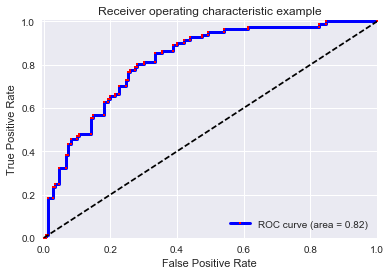

In [36]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

###### Parameter Turning

In [38]:
C_range = 10.0 ** np.arange(-2, 4)
#gamma_range = 10.0 ** np.arange(-3, 3)
# g = 1/float((len(X_train_minmax[0])))
#print g
print X_train_minmax[0]
gamma_range = [.01, .1, 1, 'auto', 10, 100]
print gamma_range
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

[ 0.29411765  0.42207792  0.4         0.42718447  0.18407534  0.06666667]
[0.01, 0.1, 1, 'auto', 10, 100]


{'C': array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
          1.00000000e+01,   1.00000000e+02,   1.00000000e+03]),
 'gamma': [0.01, 0.1, 1, 'auto', 10, 100]}

In [39]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot = accuracy_score(y_test, best_predict_minmax)
print "Prediction accuracy: ",pTot
cm = confusion_matrix(y_test, best_predict_minmax)
print cm
report = classification_report(y_test, best_predict_minmax)
print report #for each class prints: precision  recall  f1-score   support

Prediction accuracy:  0.748917748918
[[133  17]
 [ 41  40]]
             precision    recall  f1-score   support

          0       0.76      0.89      0.82       150
          1       0.70      0.49      0.58        81

avg / total       0.74      0.75      0.74       231



In [40]:
test_svc = SVC(C=100, gamma='auto',kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax_test = test_svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax_test)
print "Prediction accuracy: ",pTot

Prediction accuracy:  0.757575757576


In [41]:
cm = confusion_matrix(y_test, y_pred_minmax_test)
print cm
report = classification_report(y_test, y_pred_minmax_test)
print report #for each class prints: precision  recall  f1-score   support

[[133  17]
 [ 39  42]]
             precision    recall  f1-score   support

          0       0.77      0.89      0.83       150
          1       0.71      0.52      0.60        81

avg / total       0.75      0.76      0.75       231



In [42]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  # use the probs of (smoke), not of nonsmoking
roc_auc = auc(fpr, tpr)
print "AUC using predict_proba", roc_auc

AUC using predict_proba 0.823086419753
